In [5]:
import pandas as pd

# Step 1: Read the Dataset and Preprocess
data = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)  # Update with your dataset path
print(data.columns)  # Print the column names to check for discrepancies



Index(['INCIDENT N°', 'PROTECTIONS', 'ASSIGNED TO TOPICS',
       'TOPICS OF THE OPERATION', 'STATE', 'TRANSFERED FROM', 'TRANSFERRED TO',
       'Dummy VIN', 'GI COMMENT', 'TAGS',
       ...
       'BLOCKING FOR TEST ?', 'ALGO', 'DETECTION PILOT', 'INCIDENT PILOT',
       'FIRST DETECTION', 'LAST DETECTION', 'LAST UPDATE OF DETECTION PILOTE',
       'LAST UPDATE OF INCIDENT PILOTE', 'KEYWORDS', 'DETECTION QUERY'],
      dtype='object', length=137)


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Read the Dataset and Preprocess
data = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)  # Update with your dataset path
# Convert 'Yes' and 'No' to 1 and 0 in the 'PIMOF' column
data['PIMOF'] = data['PIMOF'].map({'Yes': 1, 'No': 0})


# Step 2: Define Sensitivity Based on Criteria
# customers with 'MIS' < 10 and 'Mileage [KM]' > 10000 are considered highly sensitive
data['Sensitivity'] = ((data['MIS'] < 10) & (data['MILEAGE (KM)'] > 10000)).astype(int)

# Step 3: Train a Model
X = data[['PIMOF', 'MIS', 'MILEAGE (KM)']]
y = data['Sensitivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Confusion Matrix:
 [[1729    0]
 [   0  405]]


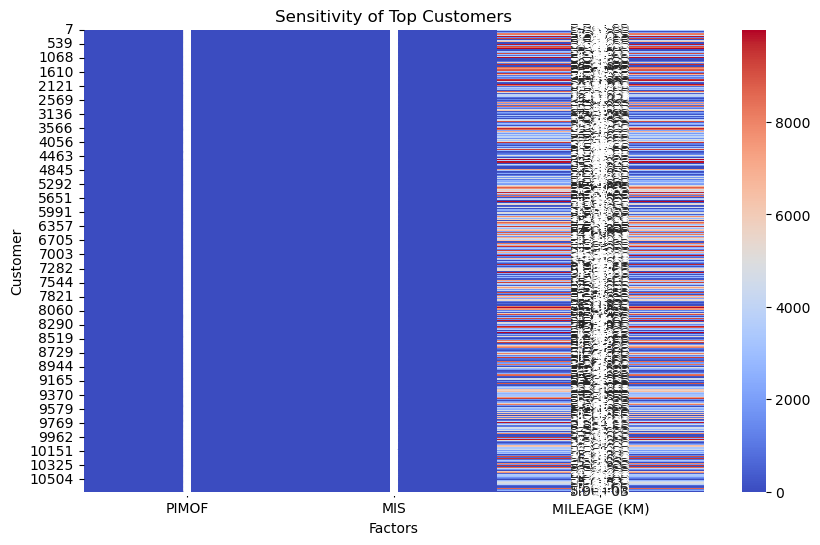

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Determine the top customers with high sensitivity
top_customers = data[data['Sensitivity'] == 1]

# Step 2: Create a heatmap to represent the sensitivity of the top customers
plt.figure(figsize=(10, 6))
sns.heatmap(top_customers[['PIMOF', 'MIS', 'MILEAGE (KM)']], cmap='coolwarm', annot=True)
plt.title('Sensitivity of Top Customers')
plt.xlabel('Factors')
plt.ylabel('Customer')
plt.show()
    


Accuracy: 1.0
Confusion Matrix:
 [[1234    0]
 [   0  900]]


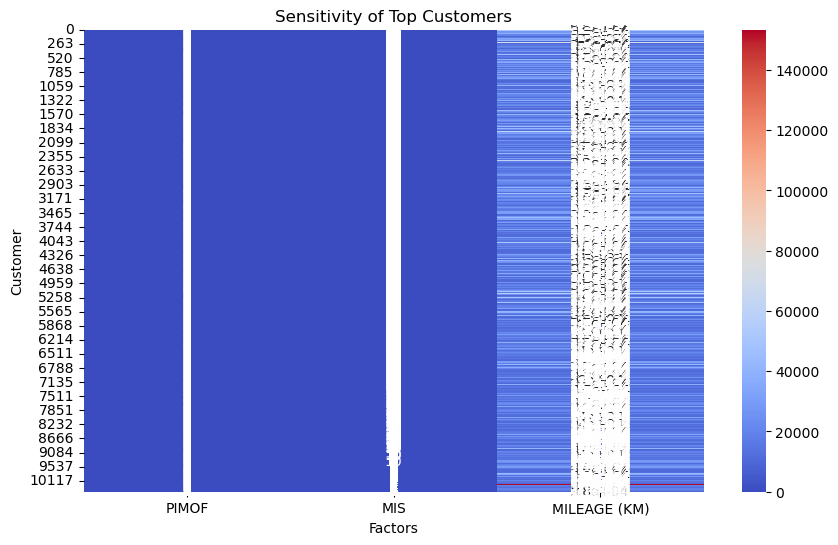

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Read the Dataset and Preprocess
data = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)  # Update with  dataset path
# Convert 'Yes' and 'No' to 1 and 0 in the 'PIMOF' column
data['PIMOF'] = data['PIMOF'].map({'Yes': 1, 'No': 0})


# Step 2: Define Sensitivity Based on Criteria
# customers with 'MIS'  > 0 and 'Mileage [KM]' > 10000 are considered highly sensitive
data['Sensitivity'] = ((data['MIS'] > 0) & (data['MILEAGE (KM)'] > 10000)).astype(int)

# Step 3: Train a Model
X = data[['PIMOF', 'MIS', 'MILEAGE (KM)']]
y = data['Sensitivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Determine the top customers with high sensitivity
top_customers = data[data['Sensitivity'] == 1]

# Step 2: Create a heatmap to represent the sensitivity of the top customers
plt.figure(figsize=(10, 6))
sns.heatmap(top_customers[['PIMOF', 'MIS', 'MILEAGE (KM)']], cmap='coolwarm', annot=True)
plt.title('Sensitivity of Top Customers')
plt.xlabel('Factors')
plt.ylabel('Customer')
plt.show()


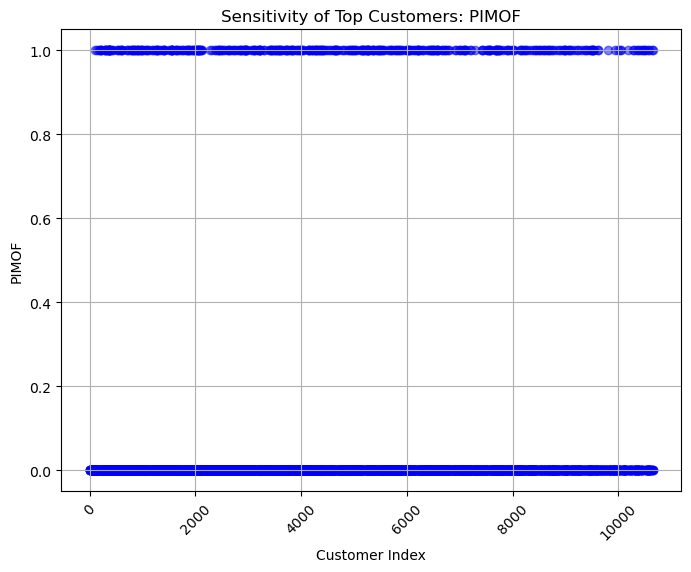

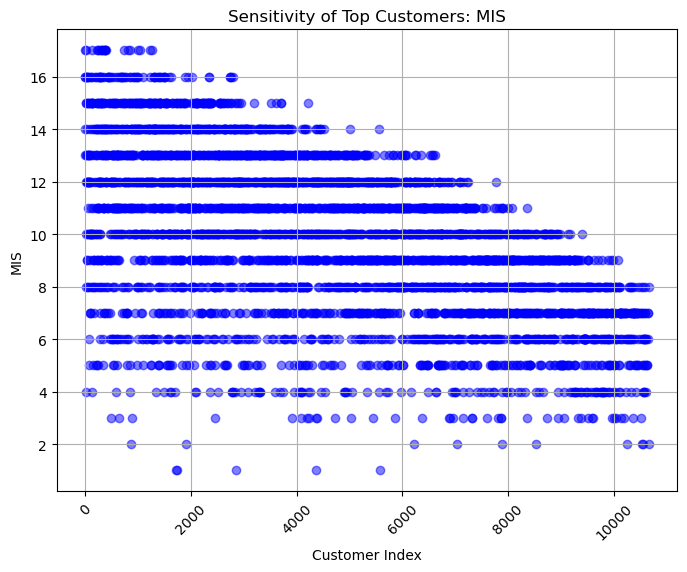

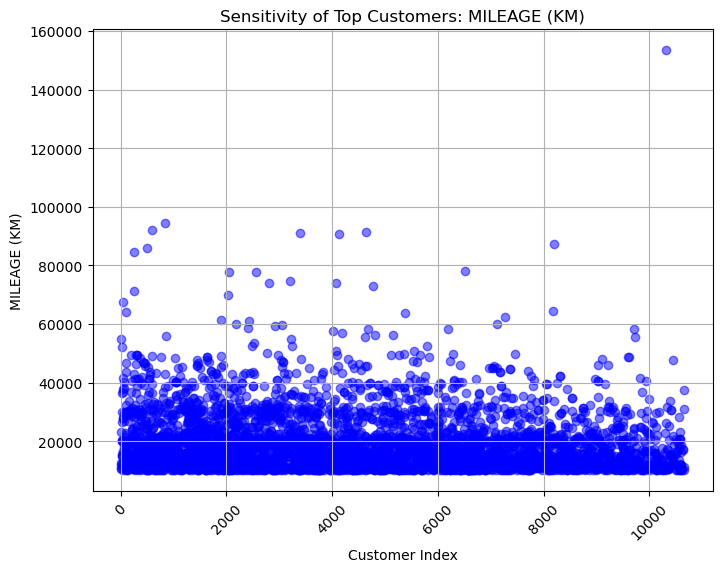

In [46]:
import matplotlib.pyplot as plt

# Step 1: Determine the top customers with high sensitivity
top_customers = data[data['Sensitivity'] == 1]

# Step 2: Create scatter plots for each factor
factors = ['PIMOF', 'MIS', 'MILEAGE (KM)']  # Specify the factors to analyze
for factor in factors:
    plt.figure(figsize=(8, 6))
    plt.scatter(top_customers.index, top_customers[factor], color='blue', alpha=0.5)
    plt.title(f'Sensitivity of Top Customers: {factor}')
    plt.xlabel('Customer Index')
    plt.ylabel(factor)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

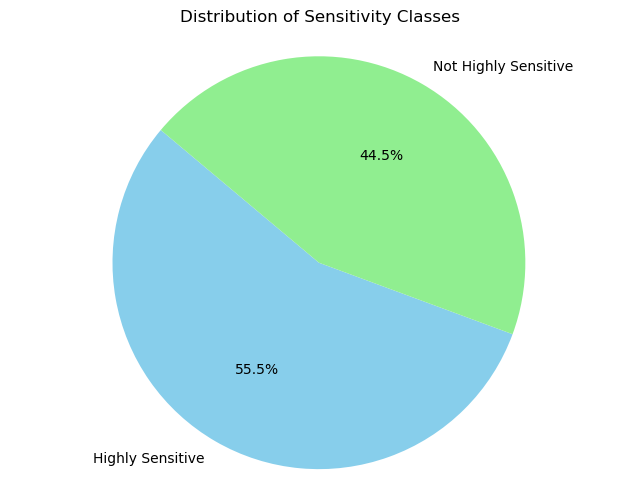

In [47]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Highly Sensitive', 'Not Highly Sensitive']
sizes = [1184, 950]  # Number of instances in each class

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Sensitivity Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

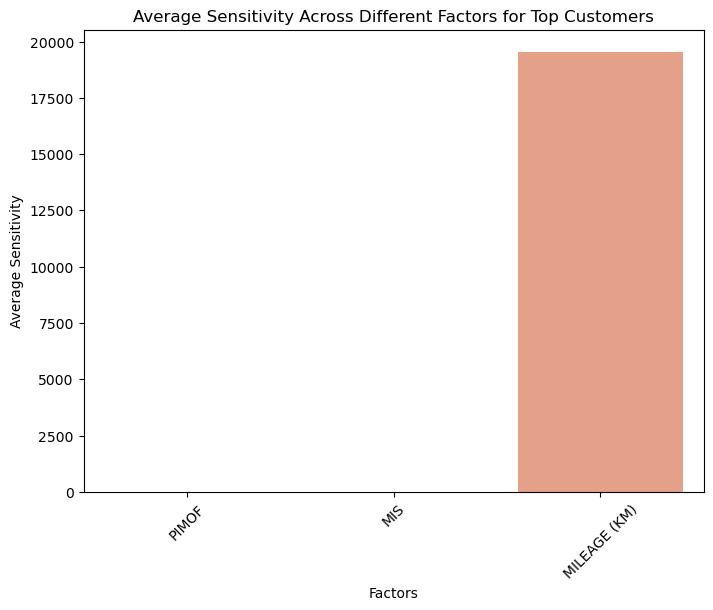

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the comparison plot
top_customers_mean = top_customers[['PIMOF', 'MIS', 'MILEAGE (KM)']].mean()

# Create a bar plot for the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=top_customers_mean.index, y=top_customers_mean.values, palette='coolwarm')
plt.title('Average Sensitivity Across Different Factors for Top Customers')
plt.xlabel('Factors')
plt.ylabel('Average Sensitivity')
plt.xticks(rotation=45)
plt.show()


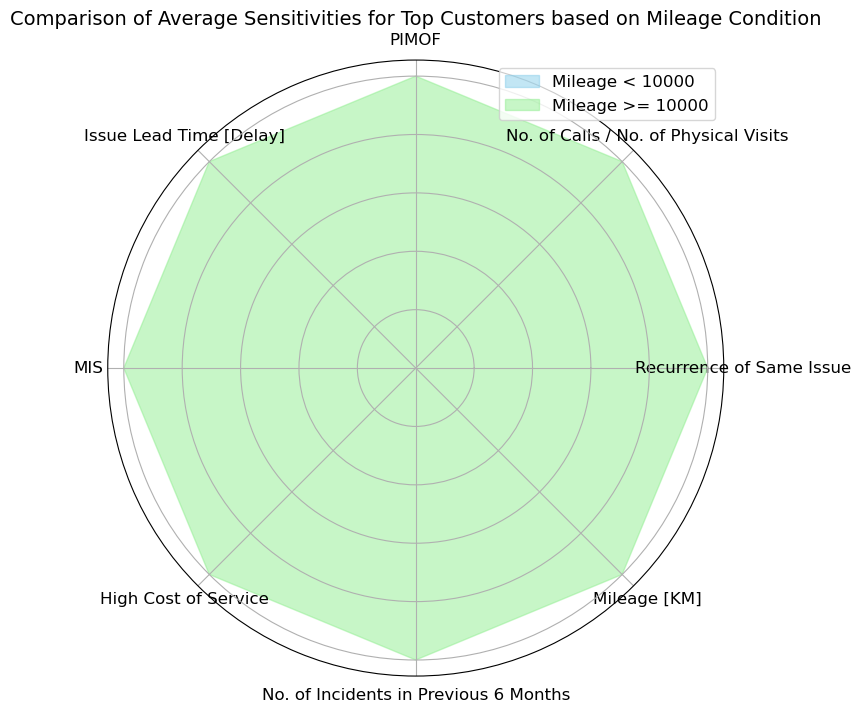

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the factors and their corresponding sensitivities
factors = ['Recurrence of Same Issue', 'No. of Calls / No. of Physical Visits', 'PIMOF', 'Issue Lead Time [Delay]', 'MIS', 'High Cost of Service', 'No. of Incidents in Previous 6 Months', 'Mileage [KM]']
sensitivities_low_mileage = [mean_sensitivity_low_mileage] * len(factors)
sensitivities_high_mileage = [mean_sensitivity_high_mileage] * len(factors)

# Number of factors
num_factors = len(factors)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_factors, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start angle to the end.
sensitivities_low_mileage += sensitivities_low_mileage[:1]
sensitivities_high_mileage += sensitivities_high_mileage[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.fill(angles, sensitivities_low_mileage, color='skyblue', alpha=0.5)
ax.fill(angles, sensitivities_high_mileage, color='lightgreen', alpha=0.5)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(factors, fontsize=12)

# Show the plot
plt.title('Comparison of Average Sensitivities for Top Customers based on Mileage Condition', fontsize=14)
plt.legend(['Mileage < 10000', 'Mileage >= 10000'], loc='upper right', fontsize=12)
plt.show()




ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

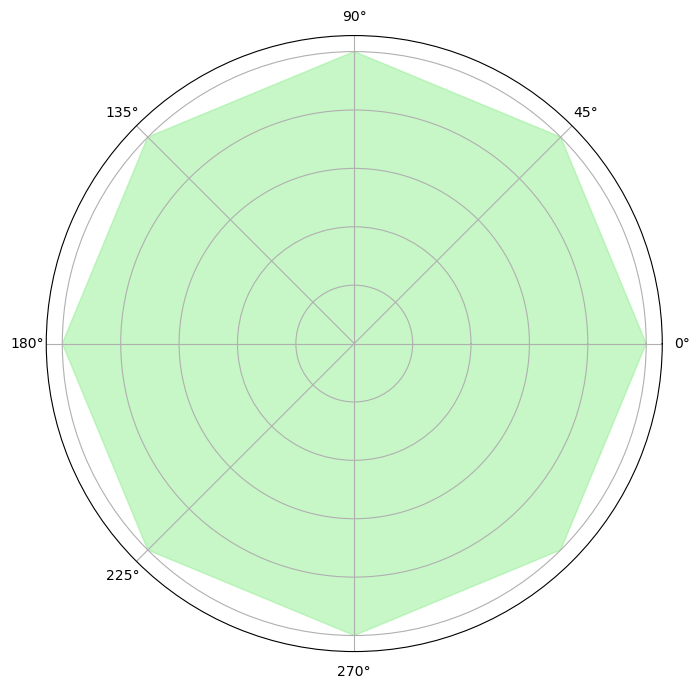

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define the factors and their corresponding sensitivities
factors = ['Recurrence of Same Issue', 'No. of Calls / No. of Physical Visits', 'PIMOF', 'Issue Lead Time [Delay]', 'MIS', 'High Cost of Service', 'No. of Incidents in Previous 6 Months', 'Mileage [KM]']
sensitivities_low_mileage = [mean_sensitivity_low_mileage] * len(factors)
sensitivities_high_mileage = [mean_sensitivity_high_mileage] * len(factors)

# Number of factors
num_factors = len(factors)

# Create a radar chart for PIMOF
angles_pimof = np.linspace(0, 2 * np.pi, num_factors, endpoint=False).tolist()

# Ensure the length of sensitivities_high_mileage matches the number of factors
sensitivities_high_mileage = sensitivities_high_mileage[:num_factors]

# Plot for PIMOF
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.fill(angles_pimof, sensitivities_low_mileage, color='skyblue', alpha=0.5)
ax.fill(angles_pimof, sensitivities_high_mileage, color='lightgreen', alpha=0.5)

# Add labels for PIMOF
ax.set_yticklabels([])
ax.set_xticks(angles_pimof[:-1])
ax.set_xticklabels(factors, fontsize=12)

# Show the plot for PIMOF
plt.title('Comparison of Average Sensitivities for Top Customers based on PIMOF', fontsize=14)
plt.legend(['Mileage < 10000', 'Mileage >= 10000'], loc='upper right', fontsize=12)
plt.show()
